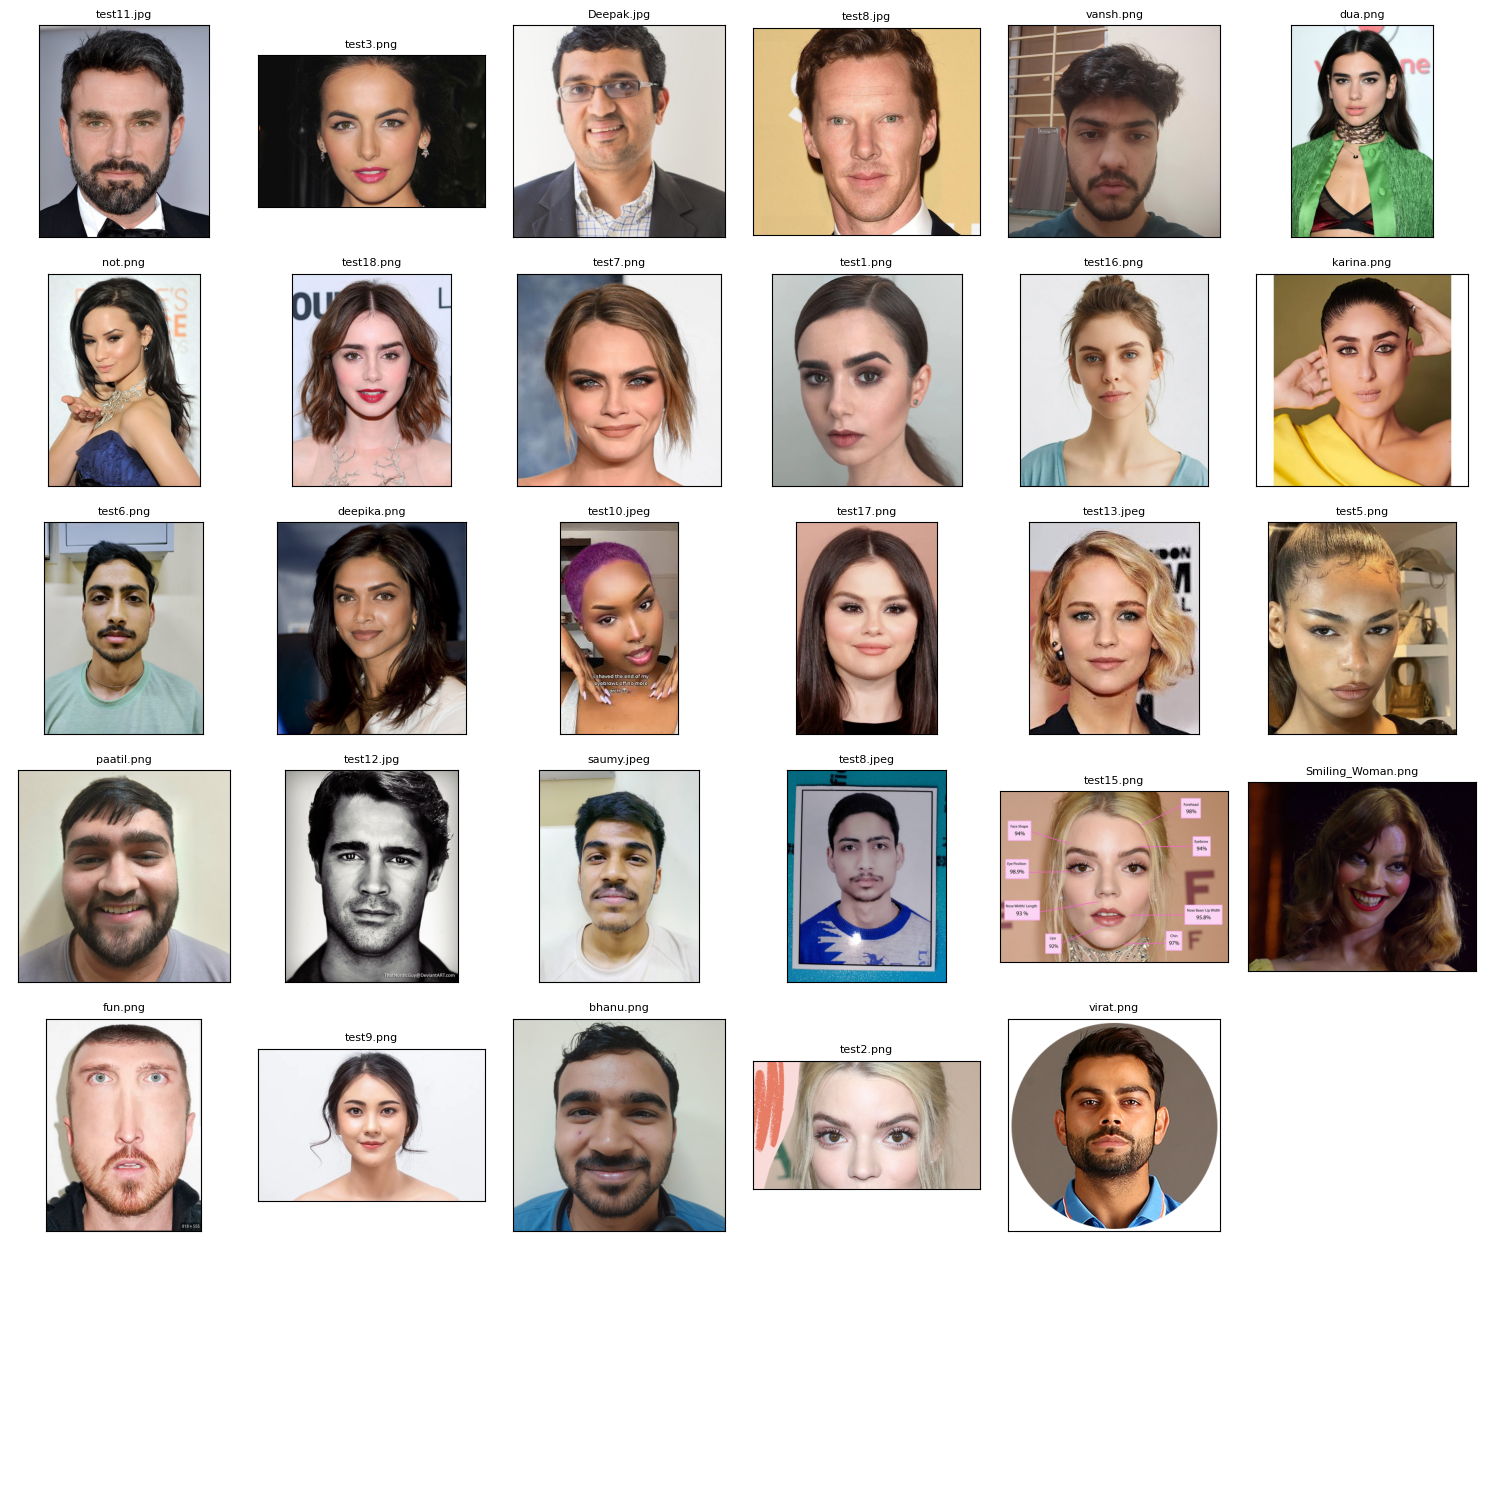

In [1]:
import os
import math
import matplotlib.pyplot as plt
from PIL import Image

# Path to your image folder
folder_path = "../TestImages/"

# Get a list of image files
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

# Number of images
num_images = len(image_files)

# Determine grid size
grid_size = math.ceil(math.sqrt(num_images))

# Set up the plot
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Remove any extra axes if the number of images is not a perfect square
for i, ax in enumerate(axes.flat):
    if i < num_images:
        img = Image.open(image_files[i])
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])
        # Set title with the image filename (without full path)
        ax.set_title(os.path.basename(image_files[i]), fontsize=8)
    else:
        ax.axis('off')  # Turn off any unused subplots

plt.tight_layout()
plt.show()


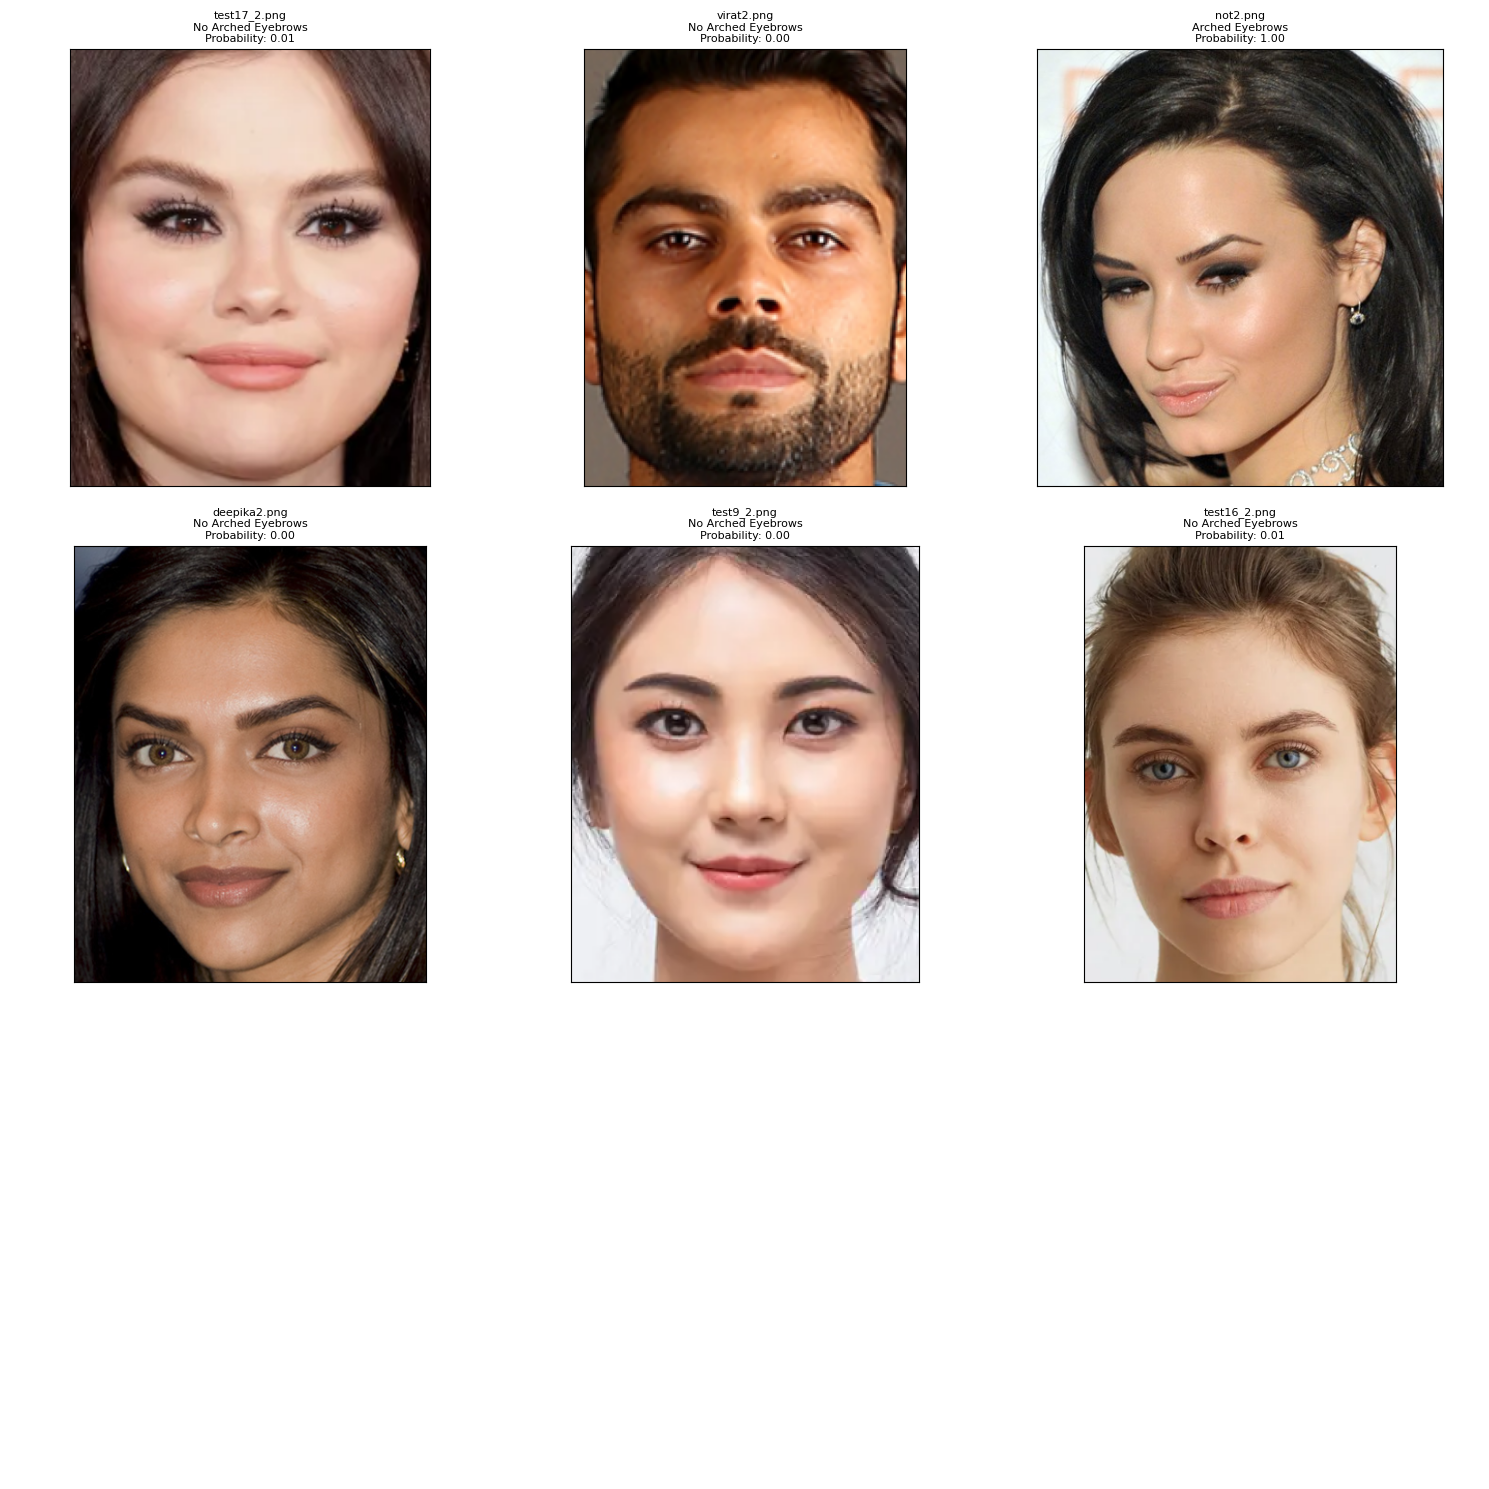

In [2]:
import os
import math
import torch
import torch.nn as nn
from torchvision import transforms, models
import matplotlib.pyplot as plt
from PIL import Image

# Path to your image folder
folder_path = "../TestImagesII/"

# Define the transformation pipeline
transformPipeline = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the model (ResNet18)
model = models.resnet18()
numFeatures = model.fc.in_features
model.fc = nn.Linear(numFeatures, 2)  # Change the final layer for our binary classification problem

# Load the model weights
model.load_state_dict(torch.load("one.pth"))
model.eval()

# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)

    # If the image has 4 channels (RGBA), convert it to 3 channels (RGB)
    if image.mode == 'RGBA':
        image = image.convert('RGB')

    # Apply transformations (resize, normalize, etc.)
    image_tensor = transformPipeline(image).unsqueeze(0)  # Add batch dimension
    return image_tensor, image

# Function to predict the class of the image
def predict_image(image_tensor):
    with torch.no_grad():
        output = model(image_tensor)
        probs = torch.softmax(output, dim=1)
        _, predicted = torch.max(output, 1)
        predicted_class = predicted.item()
        prob_class_1 = probs[0, 1].item()
    return predicted_class, prob_class_1

# Get a list of image files
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

# Number of images
num_images = len(image_files)


# Determine grid size
grid_size = math.ceil(math.sqrt(num_images))

# Set up the plot
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Loop through all images and predict
for i, ax in enumerate(axes.flat):
    if i < num_images:
        # Preprocess the image
        image_tensor, image = preprocess_image(image_files[i])

        # Predict the class and probability
        predicted_class, prob_class_1 = predict_image(image_tensor)

        # Prediction message
        prediction_message = "Arched Eyebrows" if predicted_class == 1 else "No Arched Eyebrows"
        probability_message = f"Probability: {prob_class_1:.2f}"

        # Display the image with predictions
        ax.imshow(image)
        ax.set_title(f"{os.path.basename(image_files[i])}\n{prediction_message}\n{probability_message}", fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.axis('off')  # Turn off unused subplots

plt.tight_layout()
plt.show()


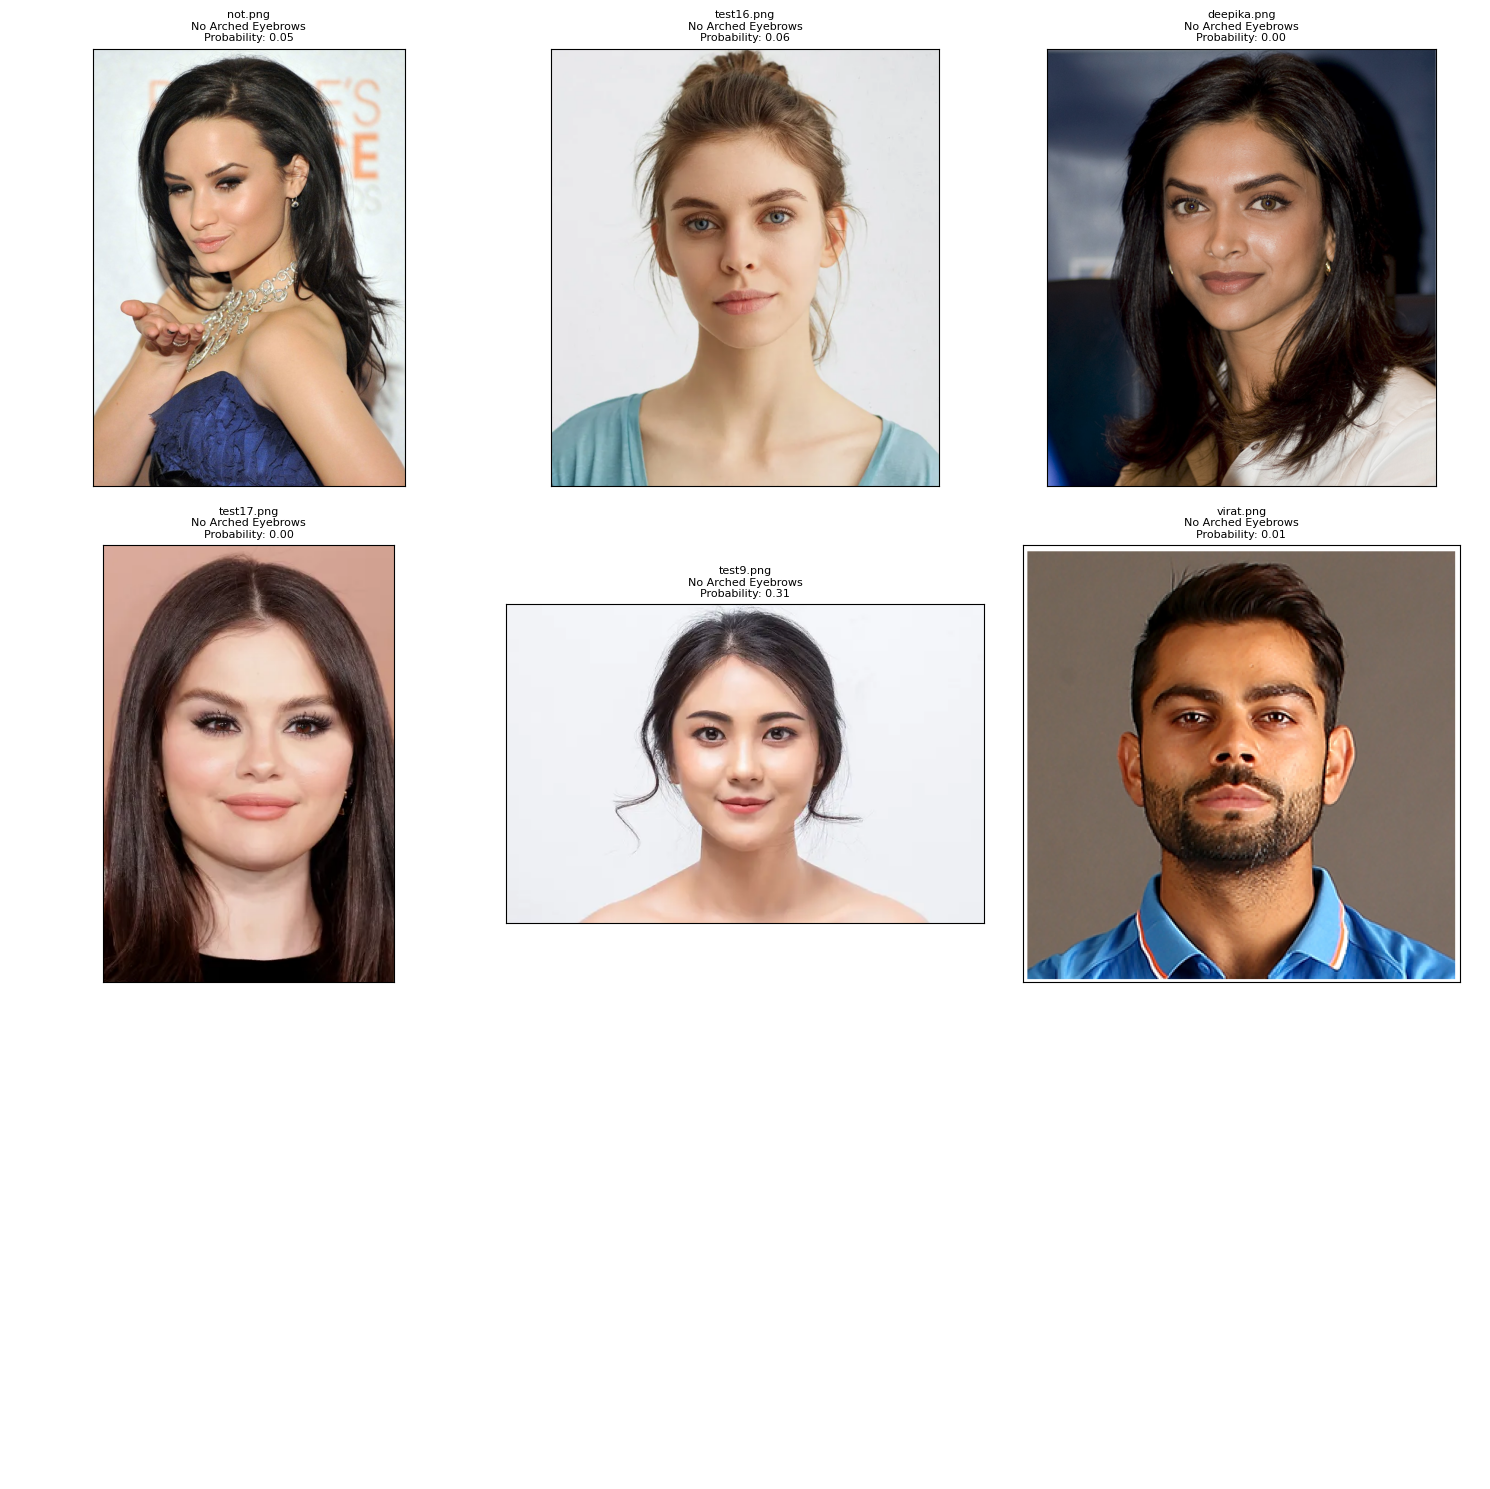

In [15]:
import os
import math
import torch
import torch.nn as nn
from torchvision import transforms, models
import matplotlib.pyplot as plt
from PIL import Image

# Path to your image folder
folder_path = "../TestImages/"

# List of specific image filenames you want to load
image_filenames = ['not.png', 'test16.png', 'deepika.png','test17.png','test9.png','virat.png']  # Replace with your actual image filenames

# Define the transformation pipeline
transformPipeline = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the model (ResNet18)
model = models.resnet18()
numFeatures = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(numFeatures, 256),  # First hidden layer
    nn.ReLU(),                    # Activation function
    nn.Dropout(0.8),               # Dropout for regularization (optional)
    nn.Linear(256, 2),           # Output layer for binary classification
)

# Load the model weights
model.load_state_dict(torch.load("model_crop2.pth"))
model.eval()

# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)

    # If the image has 4 channels (RGBA), convert it to 3 channels (RGB)
    if image.mode == 'RGBA':
        image = image.convert('RGB')

    # Apply transformations (resize, normalize, etc.)
    image_tensor = transformPipeline(image).unsqueeze(0)  # Add batch dimension
    return image_tensor, image

# Function to predict the class of the image
def predict_image(image_tensor):
    with torch.no_grad():
        output = model(image_tensor)
        probs = torch.softmax(output, dim=1)
        _, predicted = torch.max(output, 1)
        predicted_class = predicted.item()
        prob_class_1 = probs[0, 1].item()
    return predicted_class, prob_class_1

# Get a list of image files with their full paths
image_files = [os.path.join(folder_path, file) for file in image_filenames]

# Number of images
num_images = len(image_files)

# Determine grid size
grid_size = math.ceil(math.sqrt(num_images))

# Set up the plot
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Loop through the specified images and predict
for i, ax in enumerate(axes.flat):
    if i < num_images:
        # Preprocess the image
        image_tensor, image = preprocess_image(image_files[i])

        # Predict the class and probability
        predicted_class, prob_class_1 = predict_image(image_tensor)

        # Prediction message
        prediction_message = "Arched Eyebrows" if predicted_class == 1 else "No Arched Eyebrows"
        probability_message = f"Probability: {prob_class_1:.2f}"

        # Display the image with predictions
        ax.imshow(image)
        ax.set_title(f"{os.path.basename(image_files[i])}\n{prediction_message}\n{probability_message}", fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.axis('off')  # Turn off unused subplots

plt.tight_layout()
plt.show()
